In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as so
import os


In [2]:

def readVdaqFFT(fname,nperseg=200e3,fs=100e3):
    L=[]
    Nhead = 12
    nperseg = int(0.5*fs) # 0.5s segments
    #Nend = int(0.1*fs) #10000 # 100ms
    #print read_data[:Nhead]
    toVolt = 39.3216/((2**16) -1)
    toTime = 1./fs #10e-6
    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)#.reshape(shape)
    fd.close()
    f,pxx = sig.welch(toVolt*read_data[Nhead:],fs=fs,nperseg=nperseg)
    f=f[:-1]
    ppx=1e6*np.sqrt(pxx[:-1])
    P10= np.mean(ppx[10-2:10+2])
    P103= np.mean(ppx[900:1100]) 
    
    L=[P10,P103]
    return L
    

In [18]:

def plotVdaqFFT(fname, nperseg=200e3, fs=100e3):
    Nhead = 12
    nperseg = int(0.5*fs)  # 0.5s segments
    toVolt = 39.3216 / ((2 ** 16) - 1)

    fd = open(fname, 'rb')
    read_data = np.fromfile(file=fd, dtype=np.int16)
    fd.close()

    f, pxx = sig.welch(toVolt * read_data[Nhead:], fs=fs, nperseg=nperseg)
    f = f[:-1]
    ppx = 1e6 * np.sqrt(pxx[:-1])

    P10 = np.mean(ppx[np.abs(f - 10) <= 2])
    P103 = np.mean(ppx[(f >= 900) & (f <= 1100)])

    print(P10)
    print(P103)

    plt.plot(f, ppx)
    plt.yscale("log")
    plt.xscale("log")

    plt.axvline(x=10 - 5, color='r', linestyle='--', label=r'$x = {:.2f}$'.format(10 - 5))
    plt.axvline(x=10, color='g', linestyle='--', label=r'$x = {:.2f}$'.format(10))
    plt.axvline(x=900, color='r', linestyle='dotted', label=r'$x = {:.2f}$'.format(900))
    plt.axvline(x=1100, color='g', linestyle='dotted', label=r'$x = {:.2f}$'.format(1100))

    plt.xlabel(r'$f$ [Hz]', fontsize= 16)
    plt.ylabel(r'$ \frac{\mu V}{\sqrt{Hz}}$', fontsize= 16)
   

    plt.legend()
    plt.grid(True)
    plt.show()


2.9589357503054714
3.339002446238144


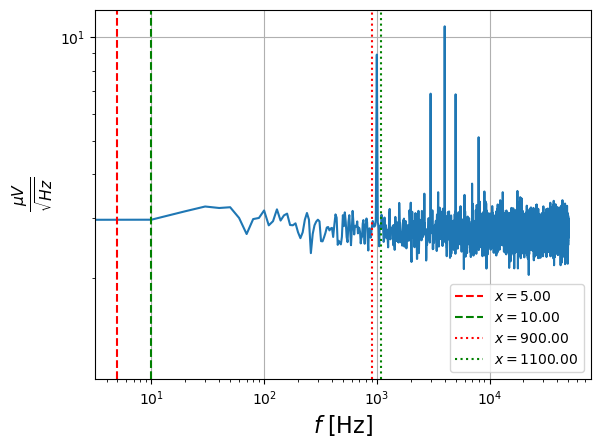

In [4]:
plotVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_0uA_UPS_trafo.bin")

readVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_4u5A_UPS_trafo.bin")

In [5]:
readVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_0uA_UPS_trafo.bin")

[2.7917233915031843, 2.725077856744048]

squidchar_noise_S1M
2.9589357503054714
3.339002446238144


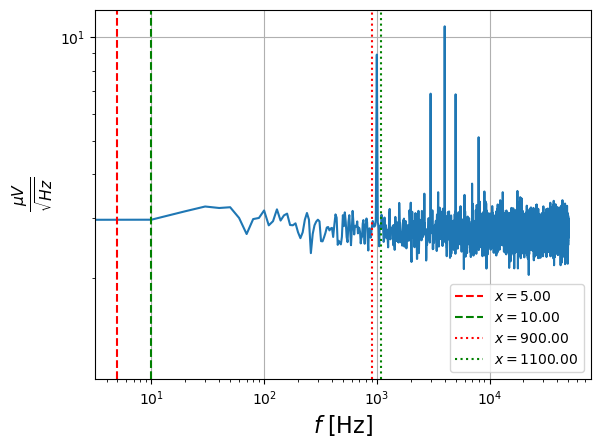

squidchar_noise_S2M
No data taken
squidchar_noise_S3M
2.397028536802019
2.451942398570101


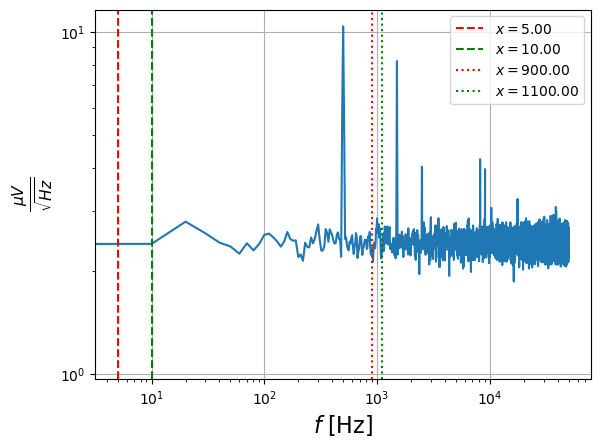

squidchar_noise_S4M
2.6512181416235308
2.8788419083009296


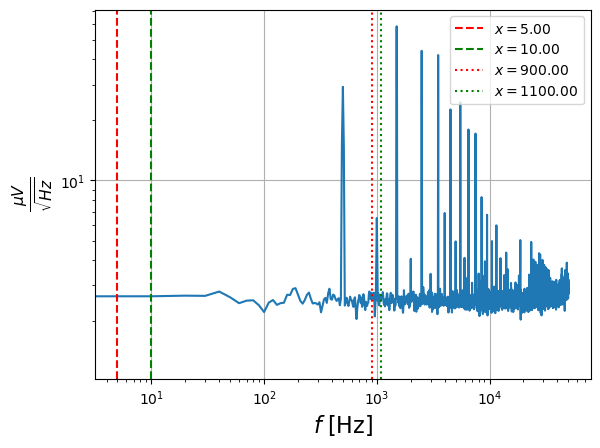

squidchar_noise_S5M
3.2720327680619787
3.2334743212982744


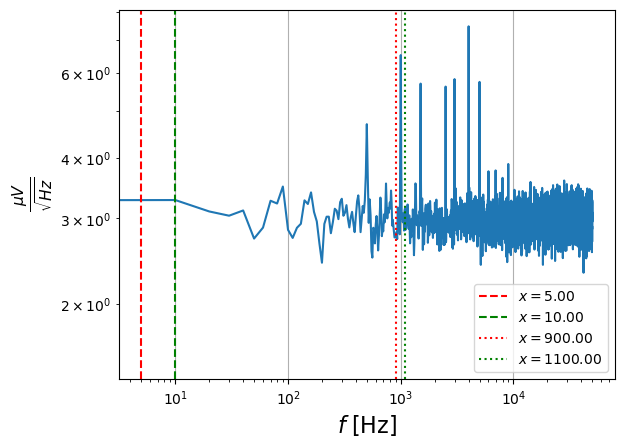

squidchar_noise_S6M
5.515498141980813
4.2527140495635125


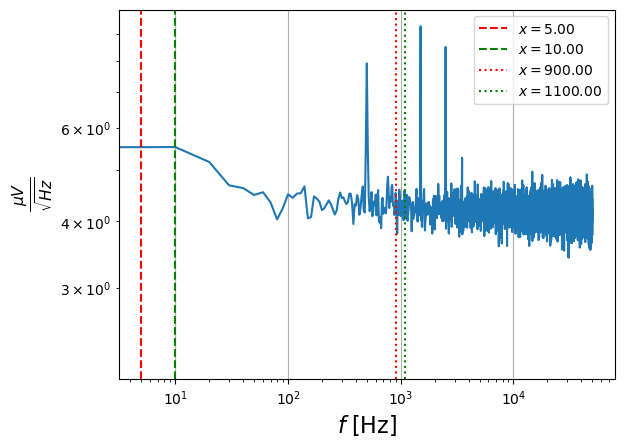

squidchar_noise_S7M
No data taken
squidchar_noise_S8M
3.5087781196658385
3.4471348916355655


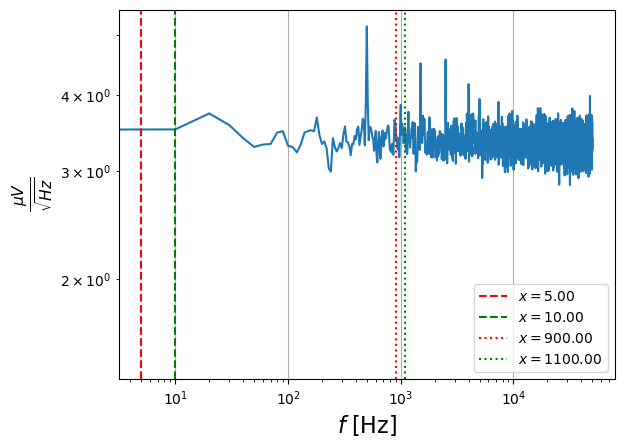

In [6]:
data=[]
F=[]
for i in range(8):
    file_path = r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S" + str(i + 1) + "M_input_0uA_UPS_trafo.bin"
    print("squidchar_noise_S" + str(i+1)+"M")
    
    if os.path.isfile(file_path):
        #readRDT(file_path)
        plotVdaqFFT(file_path)
        F=readVdaqFFT(file_path)
        data.append(F)
        F=[]
    else:
        print("No data taken")


In [7]:
print(data)

[[2.7917233915031843, 2.725077856744048], [2.8847597952459463, 2.4194480550741444], [2.592337833251168, 2.5705980519226053], [3.037041900878171, 2.9388478043733146], [5.348433849641362, 4.198359844987807], [3.7610563817798615, 3.311217237193524]]


In [8]:
row_names = ["S1M", "S3M", "S4M", "S5M", "S6M", "S8M"]
columns=["10","10^3"]
df = pd.DataFrame(data,index=row_names,columns=columns)
print(df)

           10      10^3
S1M  2.791723  2.725078
S3M  2.884760  2.419448
S4M  2.592338  2.570598
S5M  3.037042  2.938848
S6M  5.348434  4.198360
S8M  3.761056  3.311217


2.9589357503054714
3.339002446238144


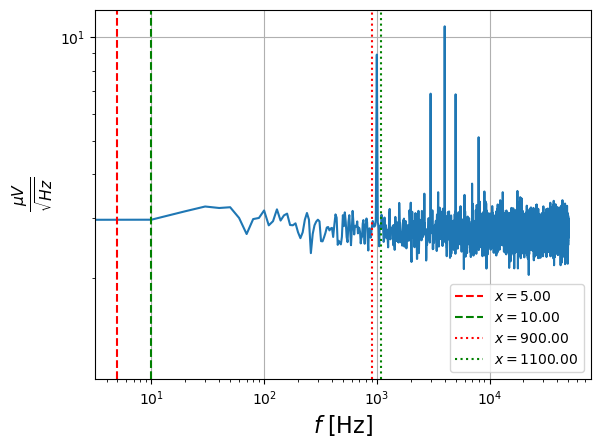

3.074361148269426
3.2380671213073318


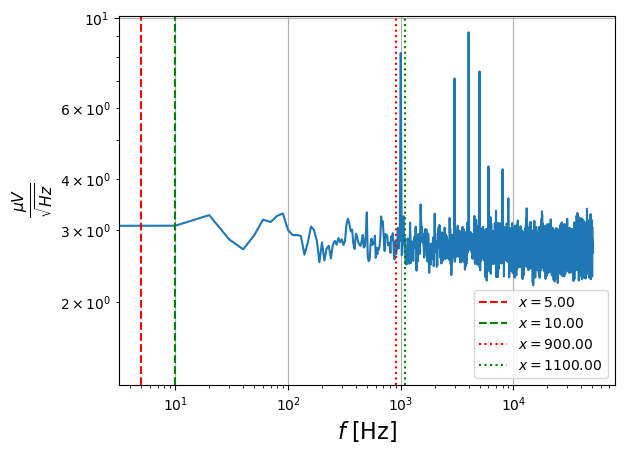

5.011394181716067
3.3662165580729018


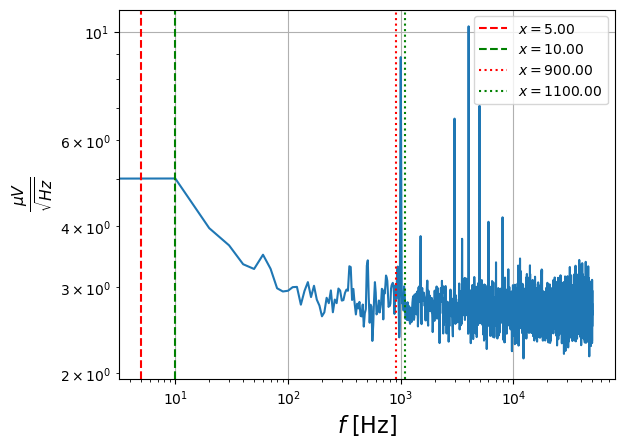

In [9]:
dataS1=[]
LS1=[]
plotVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_0uA_UPS_trafo.bin")
LS1=readVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_0uA_UPS_trafo.bin")
dataS1.append(LS1)
LS1=[]
 
plotVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_4u5A_UPS_trafo.bin")
LS1=readVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_4u5A_UPS_trafo.bin")
dataS1.append(LS1)
LS1=[]
plotVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_10uA_UPS_trafo.bin")
LS1=readVdaqFFT(r"C:\Users\n1cos\Downloads\Run47Squid\data\squidchar_noise_S1M_input_10uA_UPS_trafo.bin")
dataS1.append(LS1)
LS1=[]

In [10]:
row_names = ["S10A","S14uA", "S10uA"]
columns=["10","10^3"]
dfS1 = pd.DataFrame(dataS1,index=row_names,columns=columns)
print(dfS1)

             10      10^3
S10A   2.791723  2.725078
S14uA  3.400089  2.690669
S10uA  3.649741  2.719907


In [11]:

V2Phi0M=[972.89791191, 974.15093103, 969.60699503, 976.01422613, 975.89035757,
 976.15262824]

In [12]:
R10= df['10']/V2Phi0M
R100=df['10^3']/V2Phi0M
df["R10"] = R10#Phi_over_sqrt(Hz)10H
df["R100"]=R100#Phi_over_sqrt(Hz)100H
print(df)

           10      10^3       R10      R100
S1M  2.791723  2.725078  0.002869  0.002801
S3M  2.884760  2.419448  0.002961  0.002484
S4M  2.592338  2.570598  0.002674  0.002651
S5M  3.037042  2.938848  0.003112  0.003011
S6M  5.348434  4.198360  0.005481  0.004302
S8M  3.761056  3.311217  0.003853  0.003392


74.35868184240576
59.12861478668499


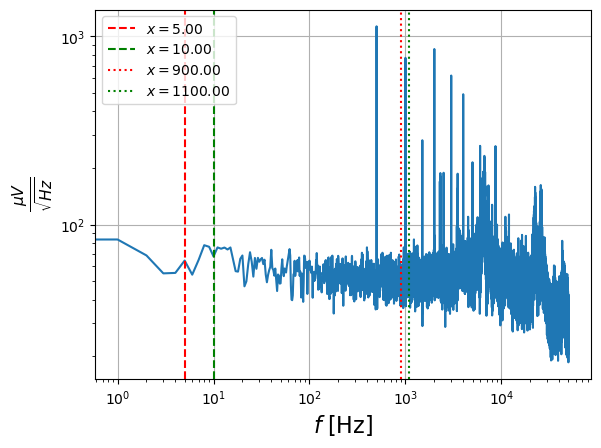

In [22]:
plotVdaqFFT(r"C:\Users\n1cos\Downloads\squidchar_185_1_M_noise.bin")

185.56563526438634
178.12017055029736


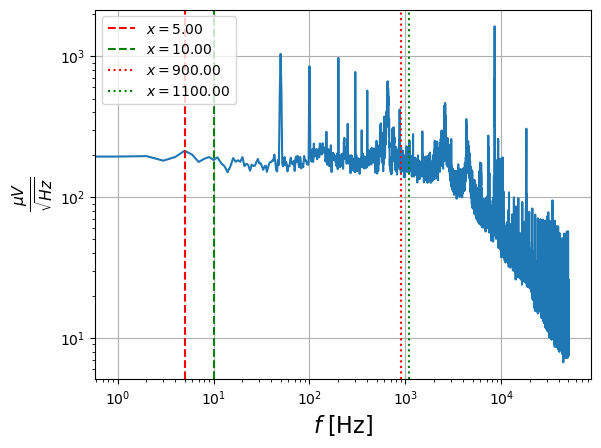

In [23]:
plotVdaqFFT(r"C:\Users\n1cos\Downloads\squidchar_185_1_M_noise100kS (1).bin")